# [畳み込みニューラルネットワーク (Convolutional Neural Networks)](https://www.tensorflow.org/tutorials/images/cnn?hl=ja)

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython

(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

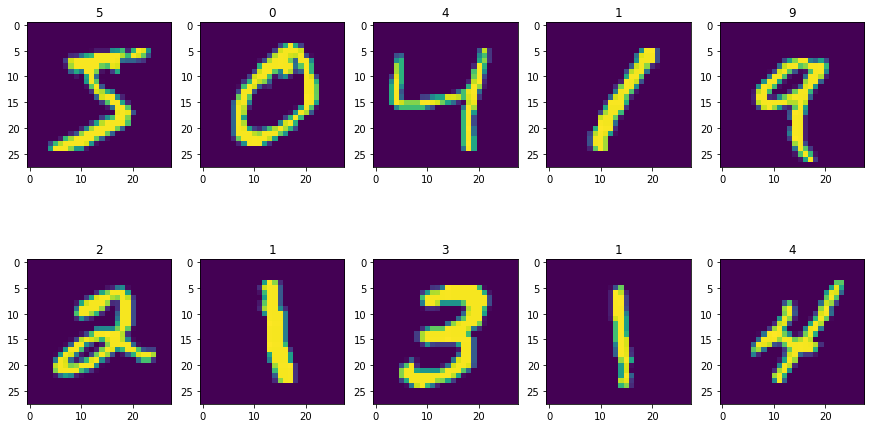

In [6]:
fig = plt.figure(figsize=(15, 8))

for x in np.arange(0,10):
    fig.add_subplot(2,5,x+1)
    plt.imshow(train_data[x])
    plt.title(train_labels[x])    

In [7]:
train_data = train_data.reshape((len(train_data), 28, 28, 1))
test_data  = test_data.reshape((len(test_data), 28, 28, 1))

train_data = train_data / 255.
test_data  = test_data / 255.

# Modeling

In [8]:
!pip install -q -U keras-tuner
import kerastuner as kt

def model_builder(hp):
    
    model = keras.Sequential()
    
    hp_units = hp.Int('units', min_value=4, max_value=512, step=32)
    model.add(keras.layers.Conv2D(hp_units, (3,3), activation='relu', input_shape=(29, 28, 1)))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-5, 1e-6, 1e-7])
    model.compile(keras.optimizers.Adam(learning_rate=hp_learning_rate), loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model


tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=50, factor=3, directory = 'my_dir', project_name='intro')

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)
        
tuner.search(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), callbacks=[ClearTrainingOutput()])
best_hp = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(best_hp)

Trial 46 Complete [00h 00m 23s]
val_accuracy: 0.9304999709129333

Best val_accuracy So Far: 0.953499972820282
Total elapsed time: 00h 14m 48s

Search: Running Trial #47

Hyperparameter    |Value             |Best Value So Far 
units             |484               |484               
learning_rate     |1e-05             |1e-05             
tuner/epochs      |17                |6                 
tuner/initial_e...|6                 |2                 
tuner/bracket     |3                 |3                 
tuner/round       |2                 |1                 
tuner/trial_id    |5ee7c0dbfd31720...|8396f5a24d0f1a7...

Epoch 7/17
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6801 - accuracy: 0.5750 - val_loss: 0.3463 - val_accuracy: 0.9051
Epoch 8/17
 612/1875 [========>.....................] - ETA: 5s - loss: 0.3633 - accuracy: 0.8990

KeyboardInterrupt: 